In [1]:
import numpy as np

In [87]:
num_samples = 1000
num_features = 2

X = np.random.normal(0, 1, (num_samples, num_features))

In [88]:
from sklearn.metrics import pairwise_distances

In [89]:
dx = pairwise_distances(X, metric='euclidean')

In [90]:
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=1, keepdims=True)

In [91]:
import matplotlib.pyplot as plt

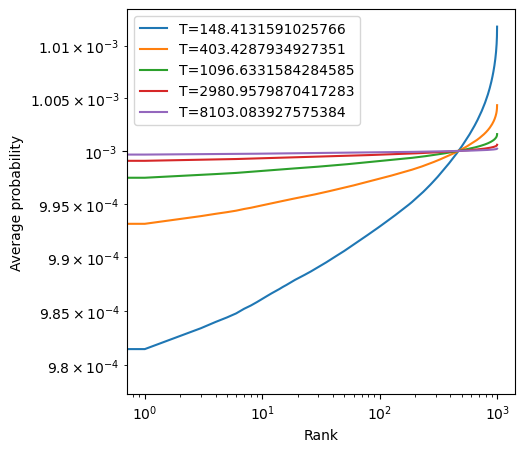

In [100]:
plt.figure(figsize=(5, 5))
for T in np.exp(np.arange(5, 10)):
    aux = np.sort(softmax(-dx / T), axis=1).mean(axis=0)
    plt.plot(aux, label='T={}'.format(T))
plt.legend()
plt.xlabel('Rank')
plt.ylabel('Average probability')
plt.show()

